# Advanced Lane Lines Detecting Project

The goals / steps of this project are the following:

1. Compute the camera calibration matrix and distortion coefficients given a set of chessboard images.
2. Apply a distortion correction to raw images.
3. Use color transforms, gradients, etc., to create a thresholded binary image.
4. Apply a perspective transform to rectify binary image ("birds-eye view").
5. Detect lane pixels and fit to find the lane boundary.
6. Determine the curvature of the lane and vehicle position with respect to center.
7. Warp the detected lane boundaries back onto the original image.
8. Output visual display of the lane boundaries and numerical estimation of lane curvature and vehicle position.

In [1]:
# First les't import the need dependencies

In [2]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

## 1. Compute the camera calibration matrix and distortion coefficients given a set of chessboard images.

In [3]:
# First step: prepare the 3D object points

objpoints = [] # undistorted real image points (3D points)
imgpoints = [] # 2D image points 
# we need to map the coordinates of the imgpoints to objpoints

# The object points (objpoints) will always be the same which are the known object points of the chessboard corners
# i.e. (0,0,0) for the first corner on the top left, and (8,5,0) for the last corner in the right bottom
# the z-coordinate is zero for all the points

# Now let's prepare the points of the objpoints 

objp = np.zeros((6*9, 3), np.float32)  # this creates a 54 x 3 matrix filled with zeros
print("objp with zeros", objp)
print("objp shape", objp.shape)

# now let's fill the x and y with the coordinates we want (i.e. (0,0,0), (1,0,0),....(8,0,0), (0,1,0), (1,1,0),...)  
objp[:,:2] = np.mgrid[0:9,0:6].T.reshape(-1,2)
print("filled objp", objp)
print("objp.shape", objp.shape)

objp with zeros [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
objp shape (54, 3)
filled objp [[0. 0. 0.]
 [1. 0. 0.]
 [2. 0. 0.]
 [3. 0. 0.]
 [4. 0. 0.]
 [5. 0. 0.]
 [6. 0. 0.]
 [7. 0. 0.]
 [8. 0. 0.]
 [0. 1. 0.]
 [1. 1. 0.]
 [2. 1. 0.]
 [3. 1. 0.]
 [4. 1. 0.]
 [5. 1. 0.]
 [6. 1. 0.]
 [7. 1. 0.]
 [8. 1. 0.]
 [0. 2. 0.]
 [1. 2. 0.]
 [2. 2. 0.]
 [3. 2. 0.]
 [4. 2. 0.]
 [5. 2. 0.]
 [6. 2. 0.]
 [7.

error: no corners found in photo:  camera_cal/calibration1.jpg
error: no corners found in photo:  camera_cal/calibration5.jpg
error: no corners found in photo:  camera_cal/calibration4.jpg


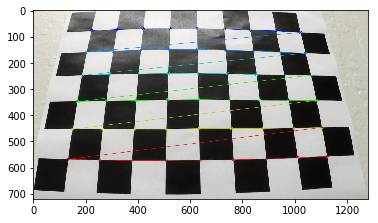

In [4]:
# Second step: get the corners of multiple distorted images
images = glob.glob('camera_cal/calibration*.jpg')
for fname in images:
    img = mpimg.imread(fname)
    # convert the image to gray to easily deal with it 
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    plt.imshow(gray, cmap="gray")

    ret, corners = cv2.findChessboardCorners(gray, (9,6), None)
    if ret == True:
        imgpoints.append(corners) # add the corners to the distorted image points
        objpoints.append(objp)    # the object points are always the same
        img = cv2.drawChessboardCorners(img, (9,6), corners, ret)
        plt.imshow(img)
    else:
        print("error: no corners found in photo: ", fname)

In [5]:
# Third step: Determine the camera matrix

# using the objectpoints we got from all the calibration images and the object points we constructed, we now:
# get the following 
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)

## 2. Apply a distortion correction to raw images.

Text(0.5,1,'undistorted image')

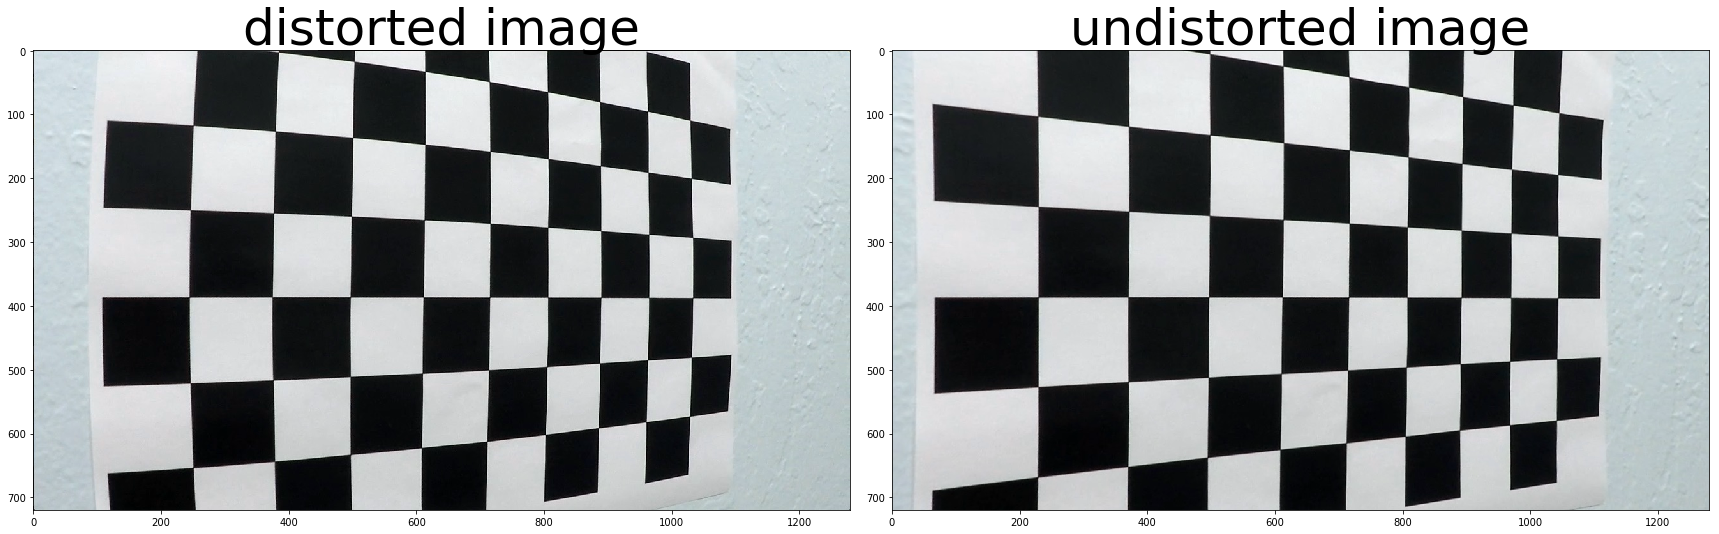

In [6]:
# Undistort the images using the camera matrix¶
# Now let's read a test image and try to undistort it
img = cv2.imread('camera_cal/calibration5.jpg')

# now undistor this image using the parameters determined in the previous steps
undist = cv2.undistort(img, mtx, dist, None, mtx)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(img, cmap='gray')
ax1.set_title('distorted image', fontsize=50)
ax2.imshow(undist, cmap='gray')
ax2.set_title('undistorted image', fontsize=50)